## <font color='blue' size=5>Data Science and Business Analytics</font> 
<font color='red'>The Sparks Foundation - GRIP June 2021</font>



**Author:** <font color='blue'> **Heena Kasali**</font>

**TASK 1:** <font color='blue'>**Prediction using Supervised ML**</font>

In this task, we will predict the percentage of marks that a student is expected to score based on the number of hours they studied. This is a simple Linear Regression task as it involves just two variables.

The steps are as follows:-

**1) Exploratory Data Analysis**

**2) Data Preparation**

**3) ML Model/Algorithm**

**4) Evaluation of Model**

**Dataset Url - http://bit.ly/w-data**

## 1. Exploratory Data Analysis

**Importing libraries**

In [1]:
# Importing all libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

**Data collection and Pre-processing**

In [3]:
# loading dataset into pandas dataframe
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data set collected successfully")

Data set collected successfully


In [4]:
# check first 15 attributes
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
# getting the shape of data set
data.shape

(25, 2)

In [6]:
# getting the information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
# getting the attributes
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [8]:
# getting the datatypes 
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [9]:
#getting the statistical values
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
#function to describe the count, mean and percentile, also the median of the dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [11]:
# checking the null values if any
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
# checking the duplicate values if any
data.duplicated().sum()

0

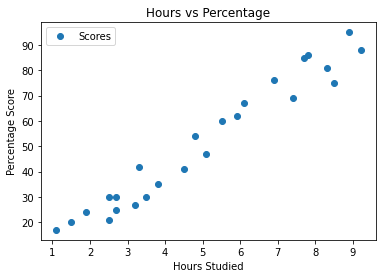

In [13]:
# line plot
data.plot(x = 'Hours', y = 'Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show('block=false')

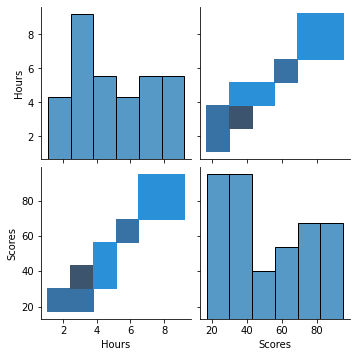

In [14]:
# scatter representation of hours and scores using a pairplot
sns.pairplot(data , kind="hist")

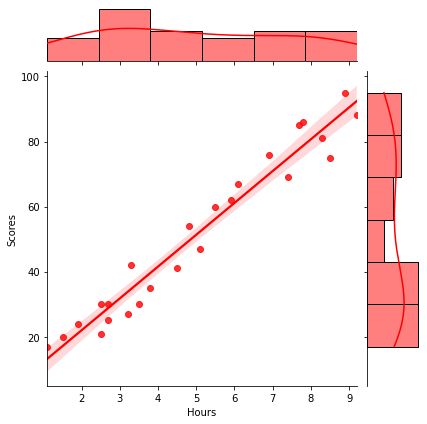

In [15]:
# joint plot
sns.jointplot(data = data, x = 'Hours', y = 'Scores', kind = 'reg', color = 'red')

### 2. Data Preperation

**Split Dataset for training and testing**

In [16]:
X = data.iloc[:, :-1].values  #X(Attribute) containing Hours starting with index '0'
y = data.iloc[:, 1].values    #y(Lables) containing Scores starting with indes '1'

print('Data prepared Successfully')

Data prepared Successfully


In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## 3. ML Model/Algorithm

**In this step the algorithm is trained and the predictions are made.**

In [18]:
#the Linear Regression Model is trained
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)    

LinearRegression()

In [19]:
# intercept
print("Intercept : ",regressor.intercept_)

Intercept :  2.5121292983200902


In [20]:
# coefficient
print("Coefficient : ",regressor.coef_)

Coefficient :  [9.73330705]


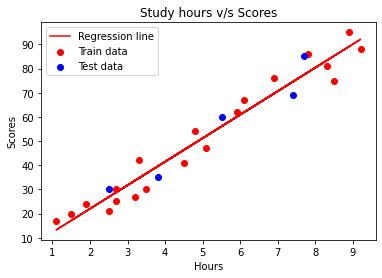

In [21]:
# plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X_train, y_train, label = "Train data", color = 'red')
plt.scatter(X_test, y_test, label = "Test data", color = 'blue')
plt.title("Study hours v/s Scores")
plt.plot(X, line, color = 'red', label = 'Regression line')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

**Making predictions** 

In [22]:
# predicting the score of sutudents
y_pred = regressor.predict(X_test)
print(y_pred)

[26.84539693 77.45859361 39.4986961  74.53860149 56.04531809]


In [23]:
print(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [24]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Varience':y_test-y_pred})  
df 

,Actual,Predicted,Varience
0,30,26.845397,3.154603
1,85,77.458594,7.541406
2,35,39.498696,-4.498696
3,69,74.538601,-5.538601
4,60,56.045318,3.954682


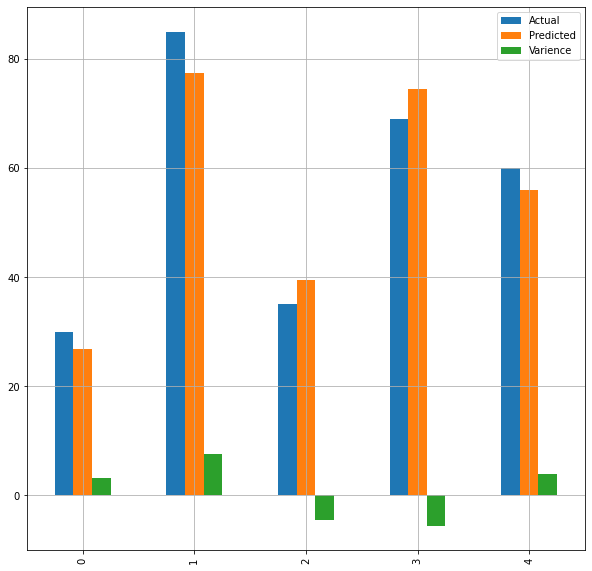

In [25]:
# plotting actual v/s predicted
df.plot(kind = 'bar', figsize = (10,10))
plt.grid()
plt.show()

In [26]:
# training accuracy and testing accuracy
print("Training Accuracy :",regressor.score(X_train,y_train))
print("Testing Accuracy :",regressor.score(X_test,y_test))

Training Accuracy : 0.954930331163377
Testing Accuracy : 0.9377551740781869


### Making a predictive model

**Our aim is to predict the score, if the student studies for 9.25 hrs a day through the model.**

In [27]:
hours = 9.25
hr1 = np.array([hours])
hr1 = hr1.reshape(-1, 1)
own_pred = regressor.predict(hr1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.54521954029958


**Predicting the score which is defined by the user**

In [28]:
hours = float(input("Enter the no of hours = "))
hr1 = np.array([hours])
hr1 = hr1.reshape(-1, 1)
own_pred = regressor.predict(hr1)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Enter the no of hours = 9.25
No of Hours = 9.25
Predicted Score = 92.54521954029958


### 4. Evaluation of the Model

**The final step is to evaluate the performance of algorithm.**

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2score = round(r2_score(y_test, y_pred)*100,3)

print("Mean Absolute Error : ",MAE)
print("Mean Squared Error : ",MSE)
print("Root Mean Squared Error : ",RMSE)
print("R2score : ",r2score)

Mean Absolute Error :  4.937597792467706
Mean Squared Error :  26.675642597052256
Root Mean Squared Error :  5.164846812544614
R2score :  93.776


### Conclusion

**If the student studies for 9.25 hrs/ day, the predicted score will be 92.54**

List of Tasks done:-

    1.Performed Exploratory Data Analysis on the dataset.

    2.Prepared the data and applied the simple Linear Regression Algorithm.

    3.Predicted the scores based on the Study Hours.

    4.Evaluated the Algorithm.